In [1]:
import os
from os import listdir 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import config

# Checking file structure

In [2]:
if not os.path.exists(config.OUTPUT_PATH):
    os.mkdir(config.OUTPUT_PATH)

# Loading in the data

In [3]:
#loading in sample data for Triton, PDMS, 0.5%

fw_list = list()
rv_list = list()

path = config.DATA_PATH + "Triton/"+ config.MATERIAL + "/" + "0.5/"

for file in listdir(path):
    #sorting the files on forward and reverse runs
    if file[-7:-4] == "fwd":
        fw_list.append(pd.read_csv(path + file))
    else:
        rv_list.append(pd.read_csv(path + file))
    
    


# Example plot for single setup

In [4]:
fw_factors = list()
fw_speeds = list()

#taking the required data
for df in fw_list:
    fw_factors.append(np.array(df["Friction Factor"]))
    fw_speeds.append(np.array(df["Sliding Speed"]))

#taking the mean of these
fw_factor = sum(fw_factors) / len(fw_factors)
fw_speed = sum(fw_speeds) / len(fw_speeds)


#Repeating for the reverse lists
rv_factors = list()
rv_speeds = list()
rev_present = False

#taking the required data
for df in rv_list:
    rv_factors.append(np.array(df["Friction Factor"]))
    rv_speeds.append(np.array(df["Sliding Speed"]))

#taking the mean of these
if len(rv_factors) > 0:
    rev_present = True
    rv_factor = sum(rv_factors) / len(rv_factors)
    rv_speed = sum(rv_speeds) / len(rv_speeds)


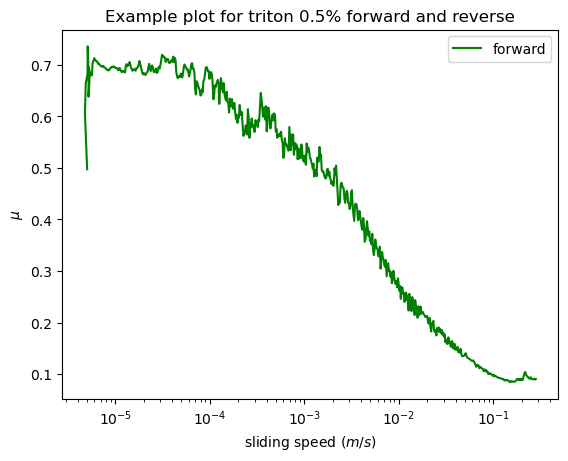

In [5]:
plt.plot(fw_speed,fw_factor, color = "green", label = "forward")
if rev_present:   
    plt.plot(rv_speed,rv_factor, color = "red", label = "reverse")
plt.xscale("log")
plt.title("Example plot for triton 0.5% forward and reverse")
plt.xlabel("sliding speed ($m/s$)")
plt.ylabel("$\mu$")
plt.legend()
#plt.savefig(config.OUTPUT_PATH + "example_reverse.png")

# Multiple concentrations

## Importing baseline data for material (TEST)

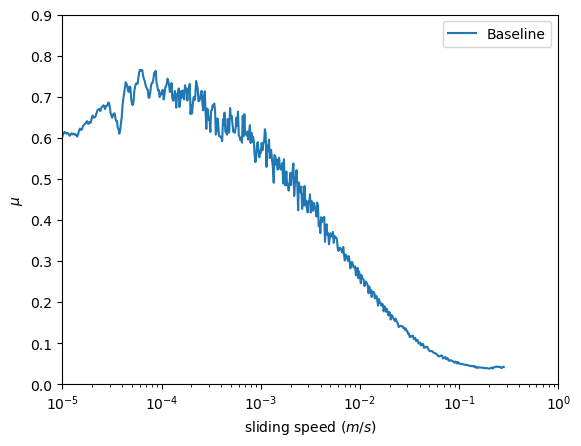

In [6]:
df = pd.read_csv(config.BASELINE_FILE)
base_factor = df["Friction Factor"]
base_speed = df["Sliding Speed"]
plt.plot(base_speed,base_factor,label = "Baseline")

plt.xscale("log")
plt.xlabel("sliding speed ($m/s$)")
plt.ylabel("$\mu$")

plt.xlim(1e-5,1)
plt.ylim(0,0.9)
plt.legend()


### Grabbing maximum of Baseline

In [7]:
Base_max = max(base_factor)

## Loading in and storing in data dictionary

In [8]:
path = config.DATA_PATH + config.SURFECTANT +"/"+ config.MATERIAL +"/"

fw_data = dict()
rv_data = dict()

#initially assume that there is no reverse data
REV = False

for folder in listdir(path):
    fw_list = list()
    rv_list = list()
    
    for file in listdir(path + folder + "/"):
        #sorting the files on forward and reverse runs
        if file[-7:-4] == "fwd":
            fw_list.append(pd.read_csv(path + folder + "/" + file))
        else:
            rv_list.append(pd.read_csv(path + folder + "/" + file))
            
    fw_factors = list()
    fw_speeds = list()

    #taking the required data
    for df in fw_list:
        fw_factors.append(np.array(df["Friction Factor"]))
        fw_speeds.append(np.array(df["Sliding Speed"]))

    #taking the mean of these
    fw_factor = sum(fw_factors) / len(fw_factors)
    fw_speed = sum(fw_speeds) / len(fw_speeds)

    #storing the arrays in the data dict
    fw_data[folder] = (fw_factor,fw_speed)
    
    #Only try to do this if there is actually data on the reverse
    if len(rv_list) > 0:
        #update reverse data flag
        REV = True
        
        #Repeating for the reverse lists
        rv_factors = list()
        rv_speeds = list()

        #taking the required data
        for df in rv_list:
            rv_factors.append(np.array(df["Friction Factor"]))
            rv_speeds.append(np.array(df["Sliding Speed"]))

        #taking the mean of these
        rv_factor = sum(rv_factors) / len(rv_factors)
        rv_speed = sum(rv_speeds) / len(rv_speeds)

        #storing the arrays in the data dict
        rv_data[folder] = (rv_factor,rv_speed)

    

    

## Plotting results

### forward

In [9]:
plt.plot(base_speed,base_factor,label = "Baseline")
for name, data in fw_data.items():
    plt.plot(data[1],data[0],label = f"{name}%")
plt.xscale("log")
plt.xlabel("sliding speed ($m/s$)")
plt.ylabel("$\mu$")
plt.title(f"{config.SURFECTANT} solutions with varying concentrations on {config.MATERIAL}, forward")
plt.xlim(1e-5,1)
plt.ylim(0,0.9)
plt.legend()

plt.savefig(config.OUTPUT_PATH + "fwd_Stribeck.png")
plt.clf()

<Figure size 640x480 with 0 Axes>

### Reverse (Not used after initial analysis)

In [10]:
#This will only be executed if the reverse data flag specifies that there is reverse data
if REV:
    for name, data in rv_data.items():
        plt.plot(data[1],data[0],label = f"{name}%")
    plt.xscale("log")
    plt.xlabel("sliding speed ($m/s$)")
    plt.ylabel("$\mu$")
    plt.title(f"Triton solutions with varying concentrations on {config.MATERIAL}, reverse")
    plt.xlim(1e-5,1)
    plt.ylim(0,0.4)
    plt.legend()
    plt.savefig(config.OUTPUT_PATH + "rev_Stribeck.png")
    plt.clf()

## Maximum analysis

In [11]:
fw_MAX_data = dict()
fw_MAX_data[0] = Base_max


for conc, data in fw_data.items():
    fw_MAX_data[float(conc)] = max(data[0])
    
X_array = list(fw_MAX_data.keys())
Y_array = list(fw_MAX_data.values())    
plt.plot(X_array,Y_array, linestyle = "None", marker = "o", label = "forward")  


if REV:
    rv_MAX_data = dict()
    for conc, data in rv_data.items():
        rv_MAX_data[float(conc)] = max(data[0])

    X_array = list(rv_MAX_data.keys())
    Y_array = list(rv_MAX_data.values())    
    plt.plot(X_array,Y_array, linestyle = "None", marker = "o", label = "reverse")
    plt.legend()
        
plt.ylabel("Maximum $\mu$")
plt.xlabel("Concentration surfectant (%)")
plt.title(f"Maxima of $\mu$ for {config.SURFECTANT} solutions on {config.MATERIAL}")
plt.xlim(0,6)
plt.ylim(0.150,0.600)

plt.savefig(config.OUTPUT_PATH + "MaximumFrictionPlot.png")
plt.clf()

<Figure size 640x480 with 0 Axes>

## MULTIPLOT

In [12]:
Materials = ["GLASS","STEEL"]
SURFs = ["DOSS","Triton","CTAB"] 

In [13]:
#Viscosity lists
T_VC = [0.0539,0.0581,0.0591,0.0663][::-1]
C_VC = [0.0524,0.0602,0.0611,0.0671][::-1]
T_VC_2 = [0.0539,0.0581,0.0591,0.0663][::-1]
C_VC_2 = [0.0524,0.0602,0.0611,0.0671][::-1]


D_VC = [0.0504,0.0539,0.0807,0.0672][::-1]
S_VC = [0.065, 0.0919][::-1]

Water_visc = 0.053

GLASS DOSS
C:/Users/Kevin/Desktop/NS project/Files/Cleaned Supervisor data/GLASS_water.csv
GLASS Triton
C:/Users/Kevin/Desktop/NS project/Files/Cleaned Supervisor data/GLASS_water.csv
GLASS CTAB
C:/Users/Kevin/Desktop/NS project/Files/Cleaned Supervisor data/GLASS_water.csv
STEEL DOSS
C:/Users/Kevin/Desktop/NS project/Files/Cleaned Supervisor data/STEEL_water.csv
STEEL Triton
C:/Users/Kevin/Desktop/NS project/Files/Cleaned Supervisor data/STEEL_water.csv
STEEL CTAB
C:/Users/Kevin/Desktop/NS project/Files/Cleaned Supervisor data/STEEL_water.csv


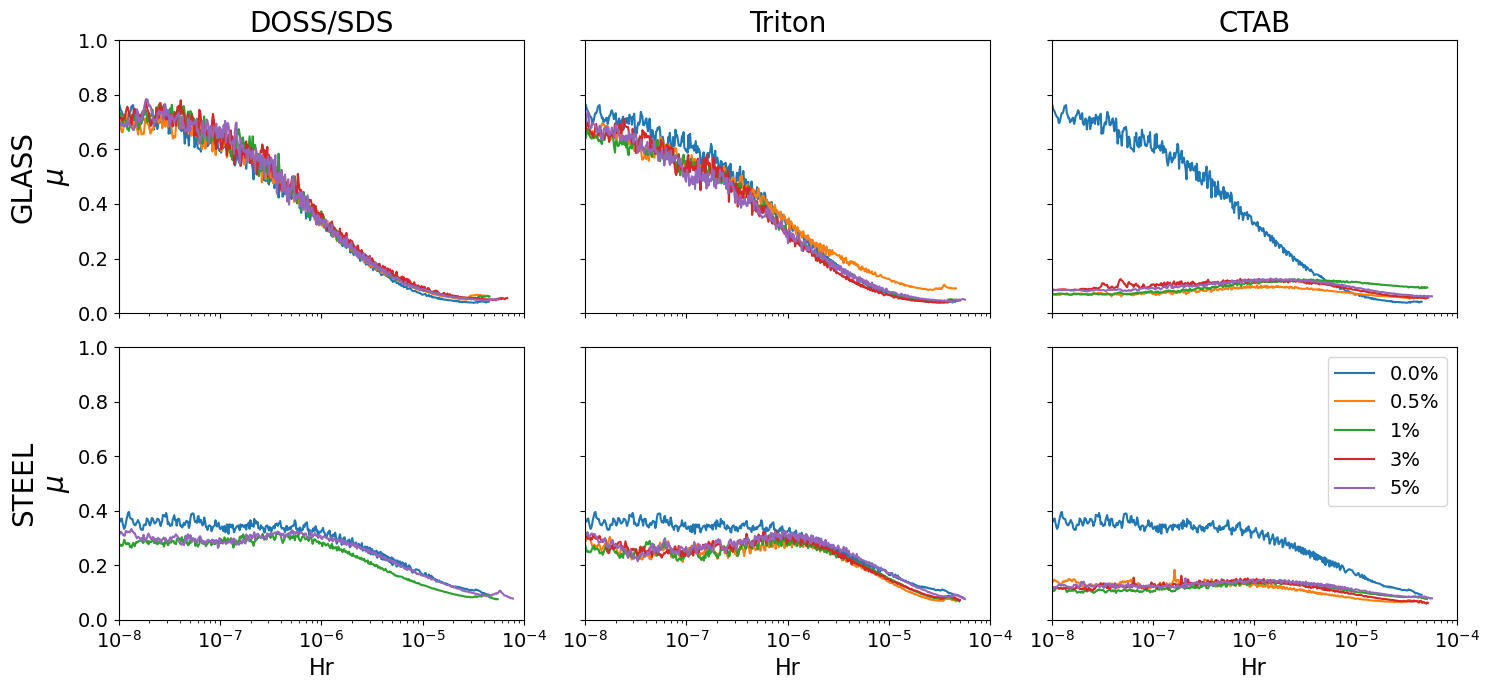

In [14]:
fig,ax = plt.subplots(2,3, figsize = (15,7), sharex = True, sharey = True)
row_idx = 0
col_idx = 0

label_size = 16
title_size = 20
tick_size = 14

for MATERIAL in Materials:
    
    col_idx = 0
    for SURFECTANT in SURFs:
        
        print(MATERIAL,SURFECTANT)
        
        BASELINE_FILE = f"C:/Users/Kevin/Desktop/NS project/Files/Baselines/{MATERIAL}_water.csv"
        df = pd.read_csv(BASELINE_FILE)
        base_factor = df["Friction Factor"]
        base_speed = df["Sliding Speed"]
        
        print(BASELINE_FILE)
        
        path = config.DATA_PATH + SURFECTANT +"/"+ MATERIAL +"/"

        fw_data = dict()

        for folder in listdir(path):
            fw_list = list()
            rv_list = list()

            for file in listdir(path + folder + "/"):
                fw_list.append(pd.read_csv(path + folder + "/" + file))
                

            fw_factors = list()
            fw_speeds = list()

            #taking the required data
            for df in fw_list:
                fw_factors.append(np.array(df["Friction Factor"]))
                fw_speeds.append(np.array(df["Sliding Speed"]))

            #taking the mean of these
            fw_factor = sum(fw_factors) / len(fw_factors)
            fw_speed = sum(fw_speeds) / len(fw_speeds)

            #storing the arrays in the data dict
            fw_data[folder] = (fw_factor,fw_speed)

        
        Base_H = base_speed * Water_visc * 0.003
        ax[row_idx,col_idx].plot(Base_H,base_factor,label = "0.0%")
        
        if row_idx == 1 and col_idx == 0:
            colors = ['#9467bd','#2ca02c']
            for name, data in fw_data.items():
                visc = S_VC.pop()
                H_num = data[1] * visc * 0.003
                
                ax[row_idx,col_idx].plot(H_num,data[0],label = f"{name}%", color = colors.pop())
        
        else:
            for name, data in fw_data.items():
                
                if SURFECTANT == "DOSS": visc = D_VC.pop()
                elif SURFECTANT == "CTAB" and MATERIAL == "GLASS": visc = C_VC.pop()
                elif SURFECTANT == "Triton" and MATERIAL == "GLASS": visc = T_VC.pop()
                elif SURFECTANT == "CTAB" and MATERIAL == "STEEL": visc = C_VC_2.pop()
                elif SURFECTANT == "Triton" and MATERIAL == "STEEL": visc = T_VC_2.pop()
                
                H_num = data[1] * visc * 0.003
                
                ax[row_idx,col_idx].plot(H_num,data[0],label = f"{name}%")
                
                
                
                
        ax[row_idx,col_idx].set_xscale("log")
        if row_idx == 1:
            ax[row_idx,col_idx].set_xlabel("Hr", fontsize = label_size)
        if col_idx == 0:
            ax[row_idx,col_idx].set_ylabel(MATERIAL + "\n$\mu$", fontsize = title_size)
            
            
        if row_idx == 0:
            if SURFECTANT == "DOSS":
                ax[row_idx,col_idx].set_title(SURFECTANT + "/SDS", fontsize = title_size)
            else:
                ax[row_idx,col_idx].set_title(SURFECTANT, fontsize = title_size)
            
        
        ax[row_idx,col_idx].set_xlim(1e-8,1e-4)
        ax[row_idx,col_idx].set_ylim(0,1)
        ax[row_idx,col_idx].tick_params(axis='both', which='major', labelsize=tick_size)
        
        col_idx += 1
    row_idx +=1
plt.legend(fontsize = tick_size)
plt.tight_layout()
  
plt.savefig(config.OUTPUT_PATH + "complete_plot.png", dpi = 500)
        